In [15]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def getData(balance_ones=True, Ntest=1000):
    # images are 48x48 = 2304 size vectors
    Y = []
    X = []
    first = True
    for line in open('fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    # shuffle and split
    X, Y = shuffle(X, Y)
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xvalid, Yvalid = X[-Ntest:], Y[-Ntest:]

    if balance_ones:
        # balance the 1 class
        X0, Y0 = Xtrain[Ytrain!=1, :], Ytrain[Ytrain!=1]
        X1 = Xtrain[Ytrain==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        Xtrain = np.vstack([X0, X1])
        Ytrain = np.concatenate((Y0, [1]*len(X1)))

    return Xtrain, Ytrain, Xvalid, Yvalid

In [16]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [17]:
def main():
    X, Y, _, _ = getData(balance_ones=False)

    while True:
        for i in range(7):
            x, y = X[Y==i], Y[Y==i]
            N = len(y)
            j = np.random.choice(N)
            plt.imshow(x[j].reshape(48, 48), cmap='gray')
            plt.title(label_map[y[j]])
            plt.show()
        prompt = input('Quit? Enter Y:\n')
        if prompt.lower().startswith('y'):
            break

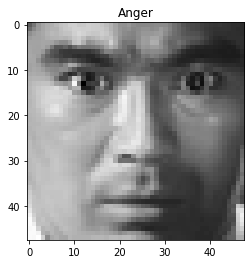

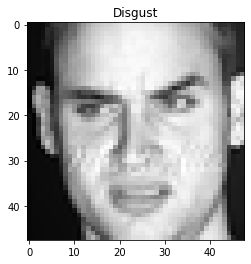

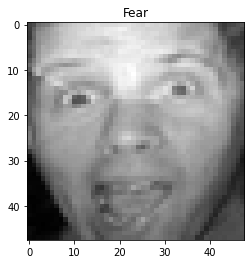

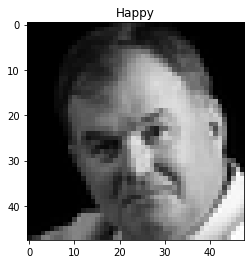

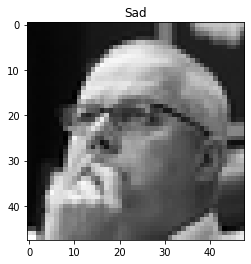

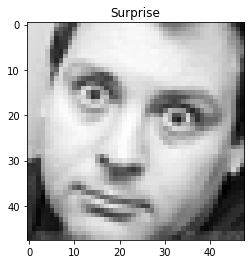

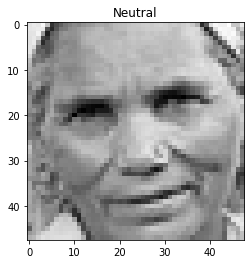

Quit? Enter Y:
s


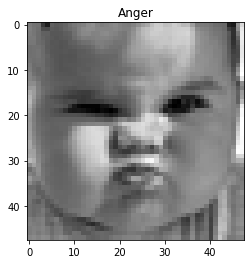

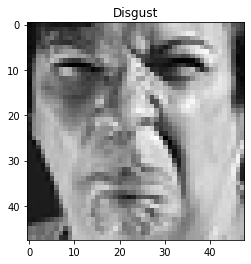

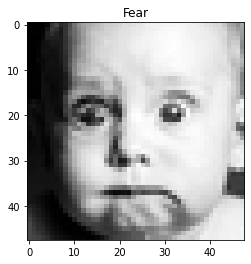

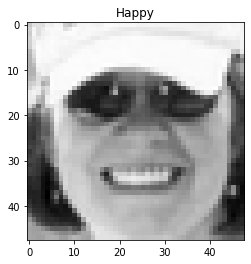

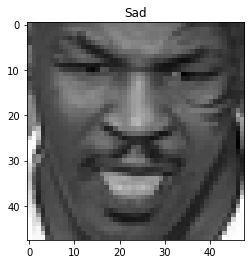

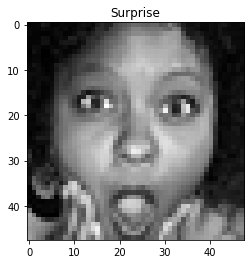

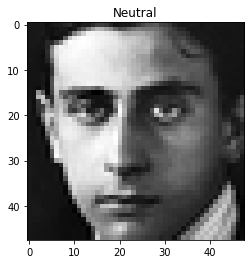

Quit? Enter Y:
s


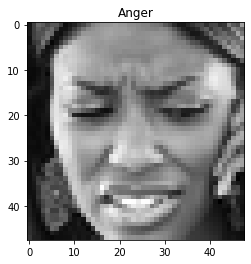

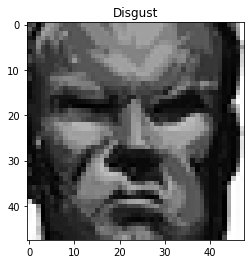

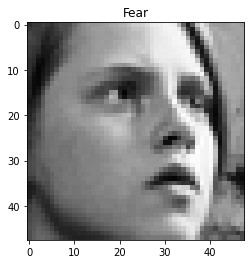

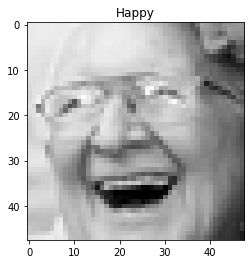

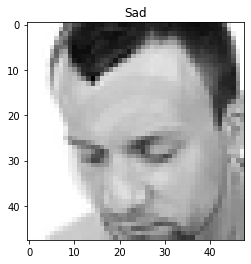

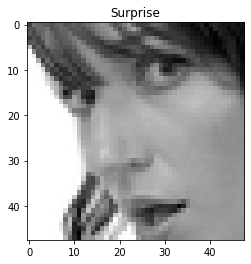

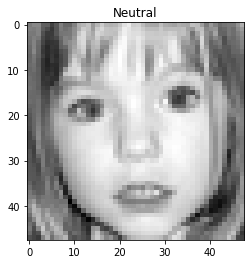

Quit? Enter Y:
s


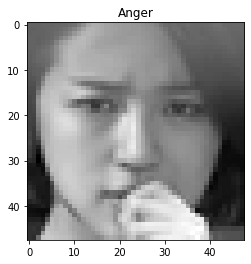

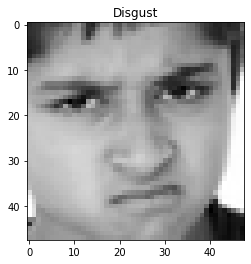

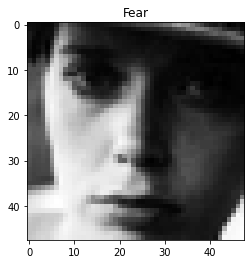

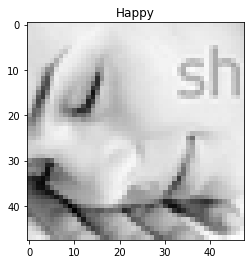

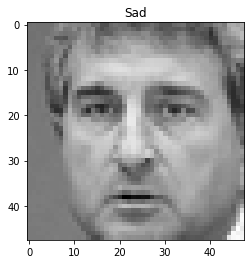

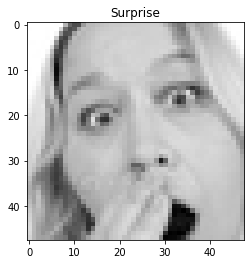

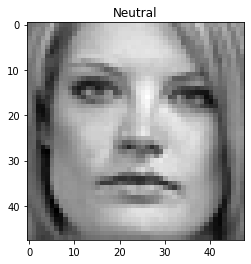

Quit? Enter Y:



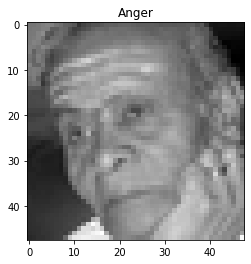

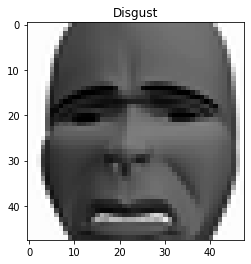

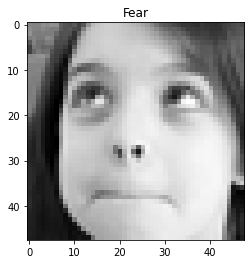

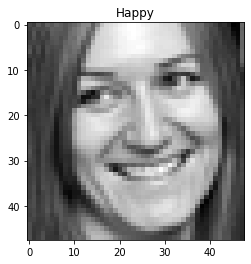

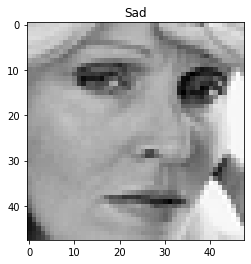

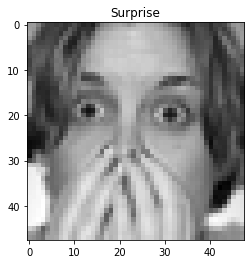

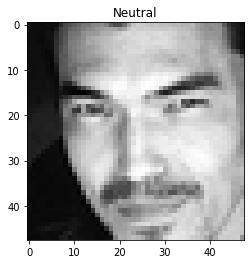

Quit? Enter Y:



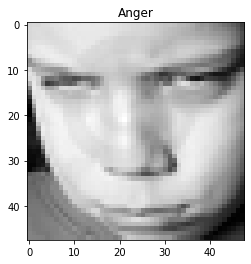

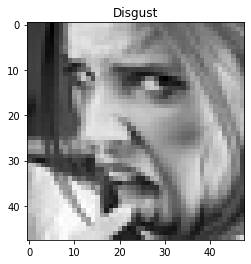

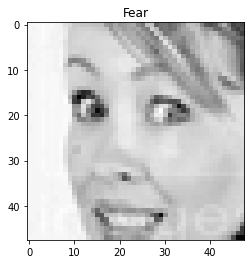

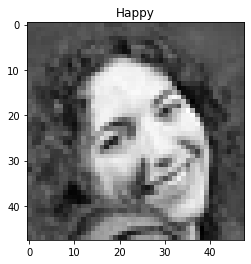

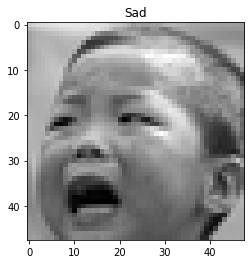

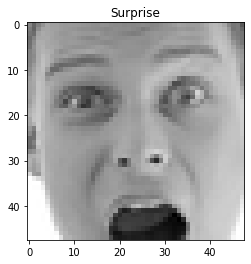

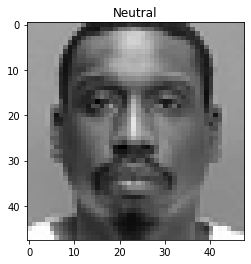

Quit? Enter Y:



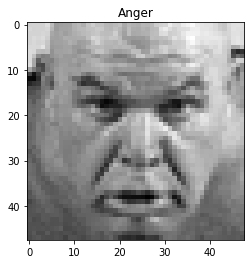

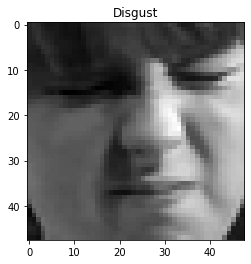

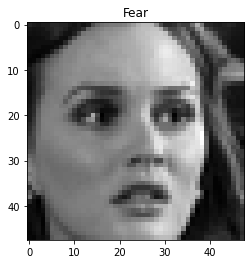

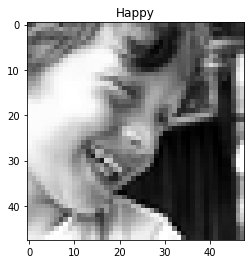

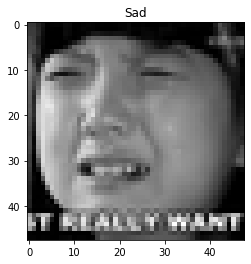

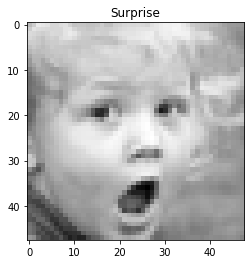

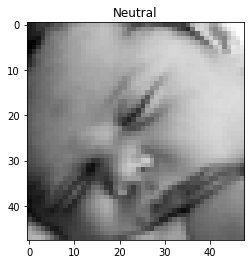

Quit? Enter Y:



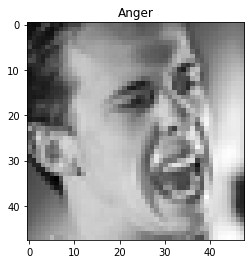

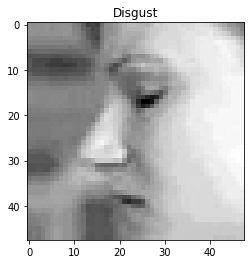

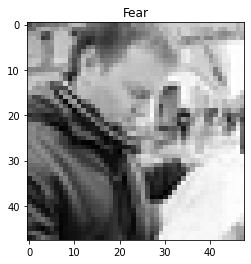

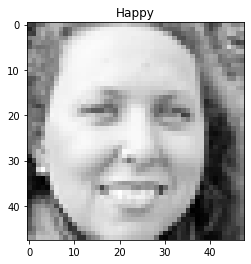

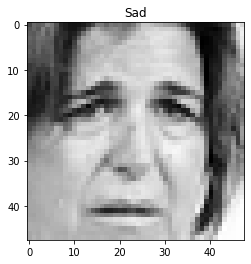

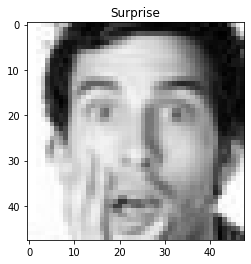

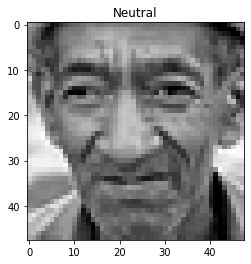

Quit? Enter Y:



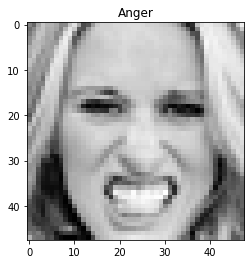

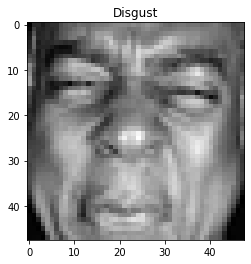

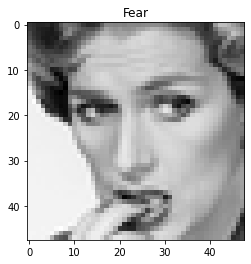

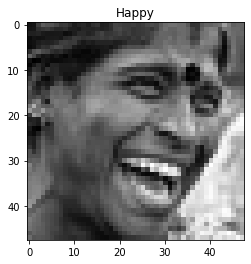

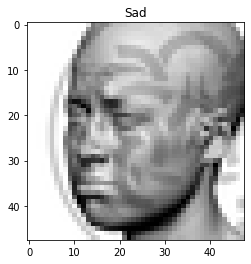

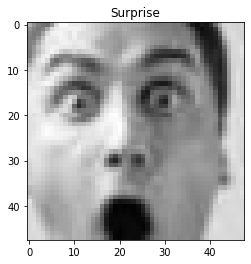

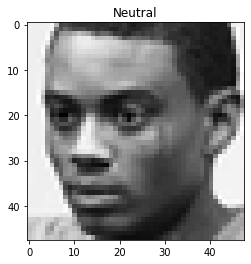

Quit? Enter Y:



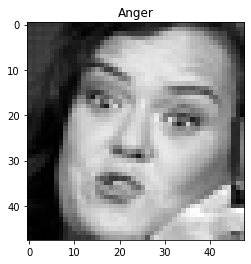

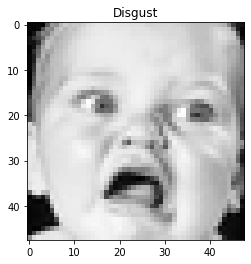

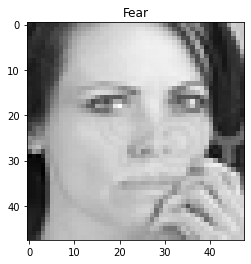

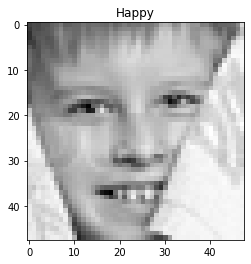

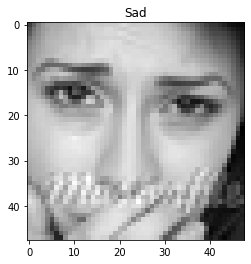

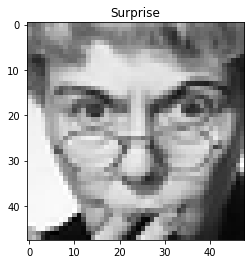

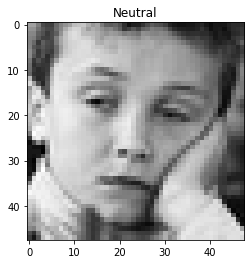

Quit? Enter Y:



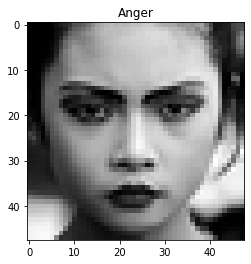

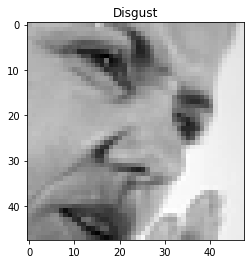

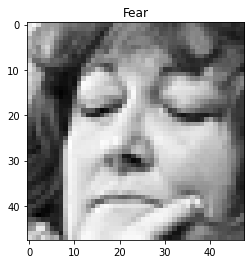

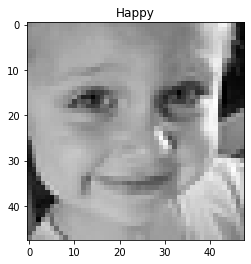

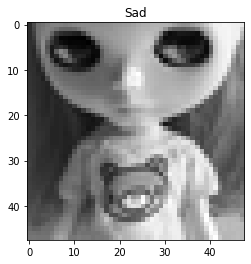

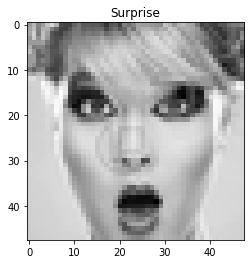

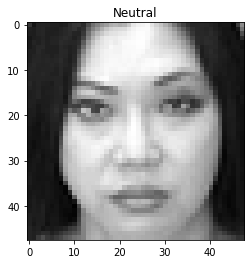

Quit? Enter Y:



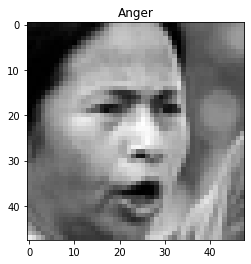

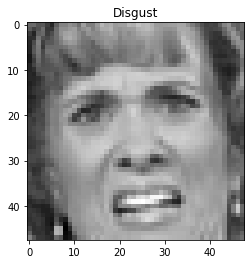

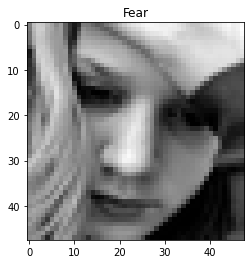

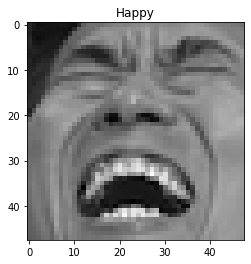

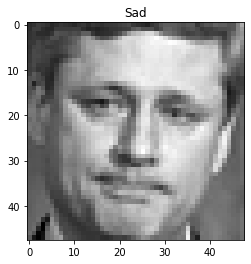

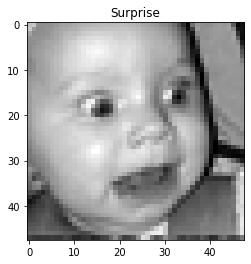

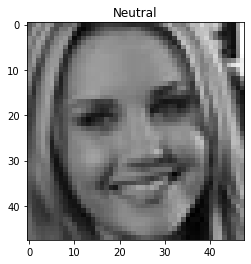

Quit? Enter Y:
d


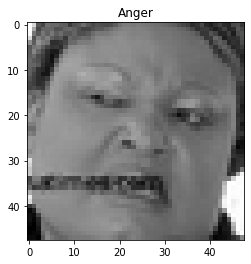

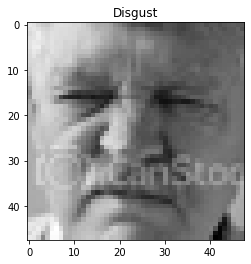

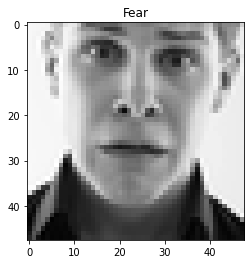

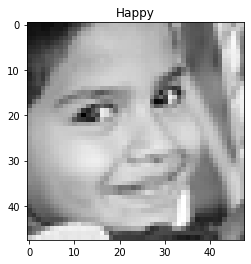

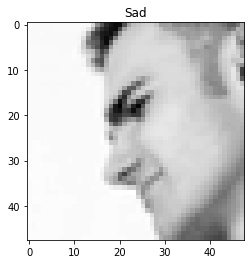

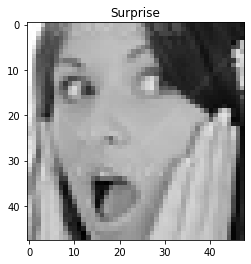

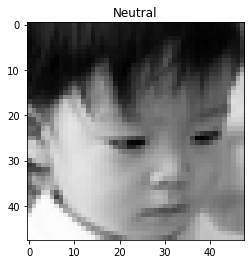

Quit? Enter Y:
d


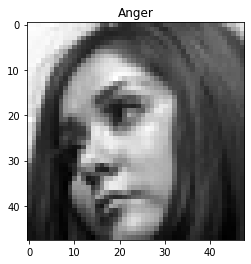

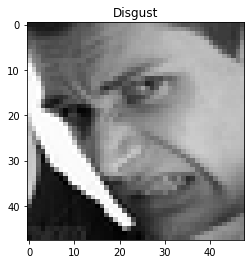

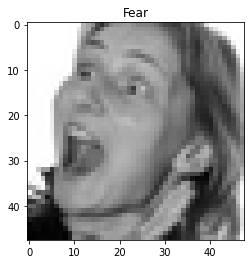

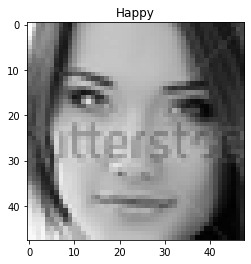

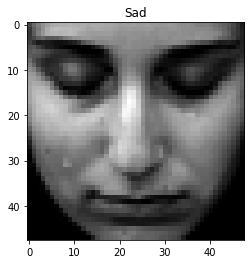

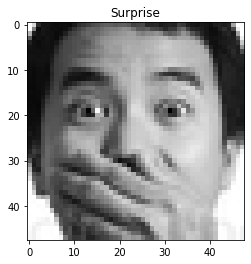

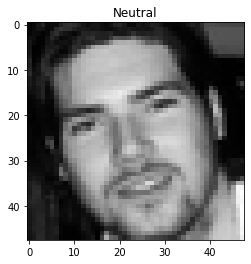

Quit? Enter Y:
d


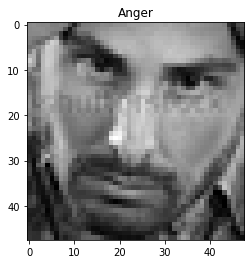

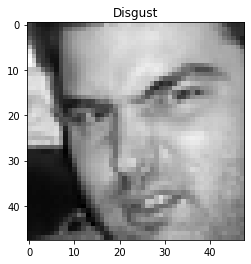

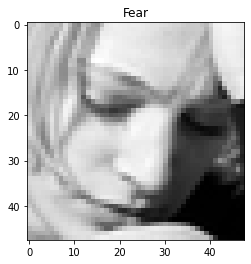

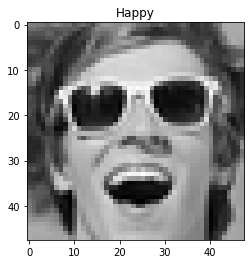

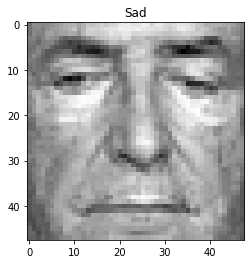

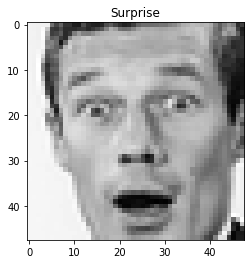

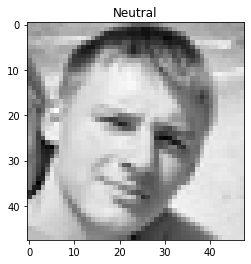

Quit? Enter Y:
d


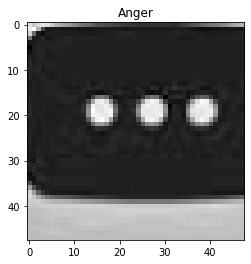

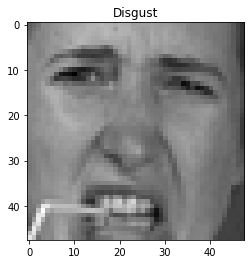

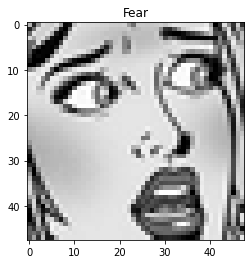

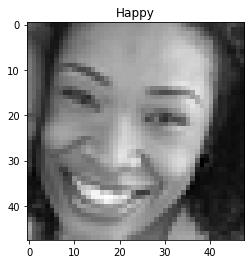

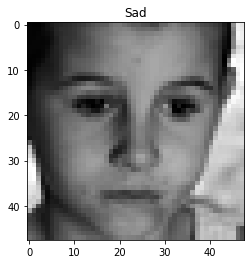

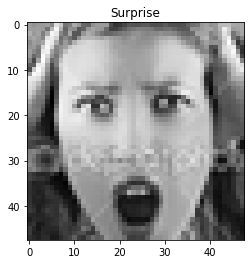

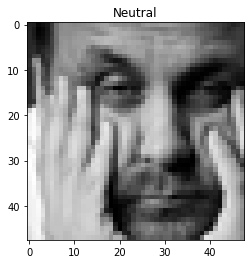

Quit? Enter Y:
d


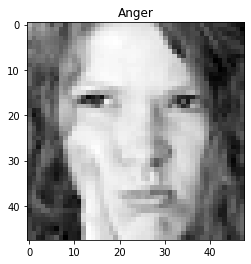

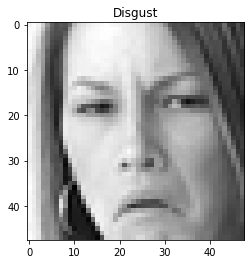

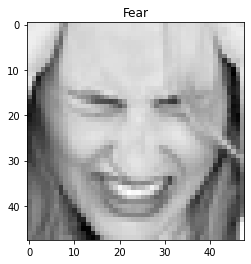

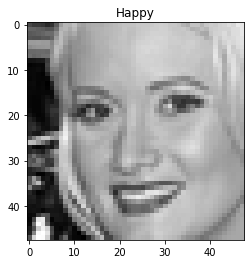

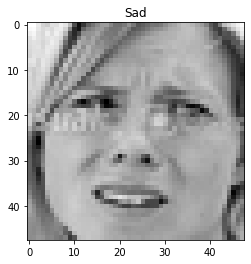

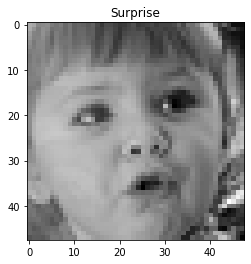

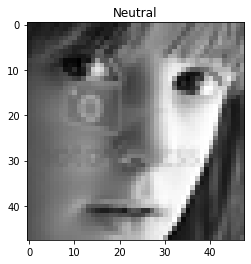

Quit? Enter Y:
d


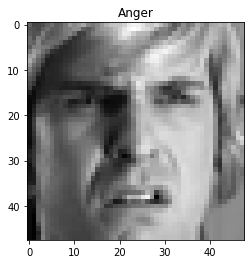

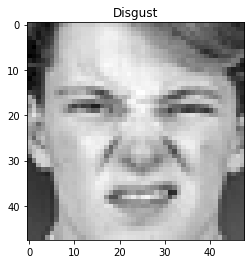

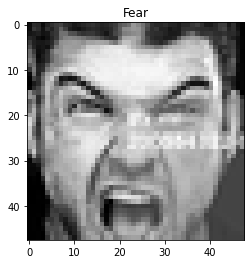

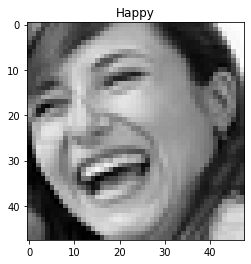

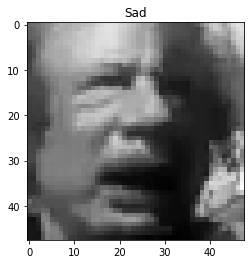

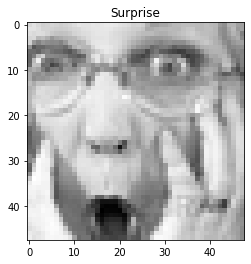

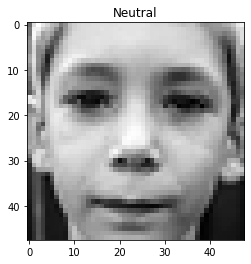

Quit? Enter Y:
d


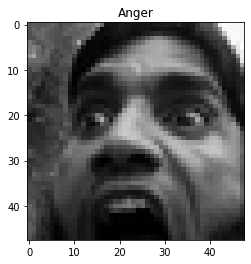

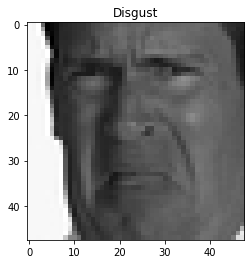

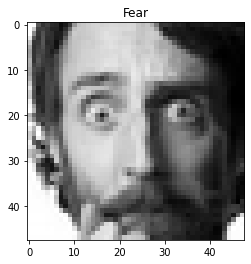

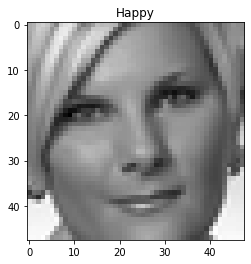

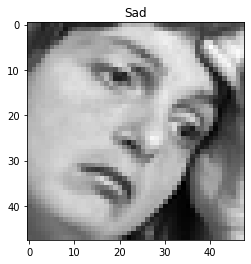

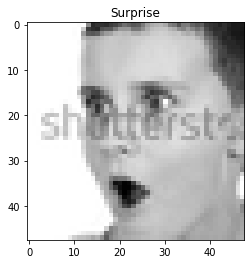

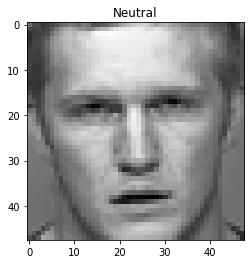

Quit? Enter Y:
d


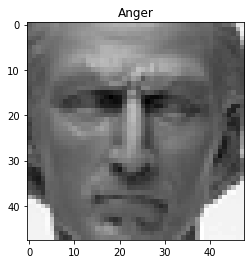

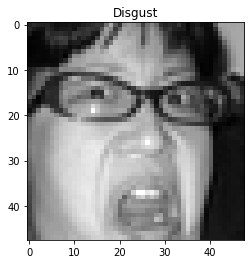

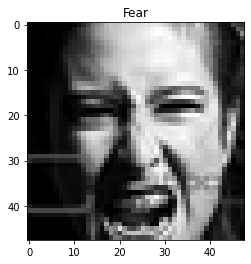

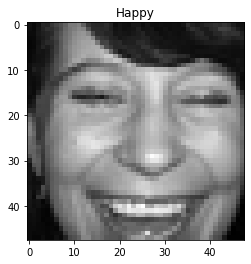

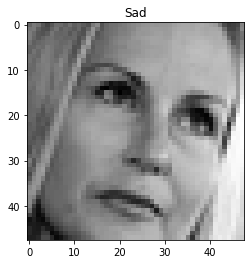

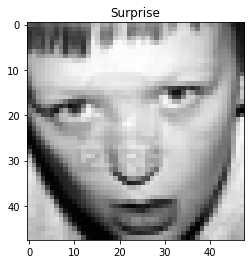

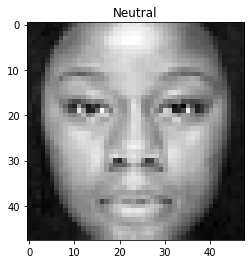

Quit? Enter Y:
y


In [19]:
if __name__ == '__main__':
    main()

In [20]:
def getBinaryData():
    Y = []
    X = []
    first = True
    for line in open('fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            y = int(row[0])
            if y == 0 or y == 1:
                Y.append(y)
                X.append([int(p) for p in row[1].split()])
    return np.array(X) / 255.0, np.array(Y)

In [21]:
def sigmoid(A):
    return 1 / (1 + np.exp(-A))

In [22]:
def sigmoid_cost(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [23]:
def error_rate(targets, predictions):
    return np.mean(targets != predictions)

In [43]:
#logisticmodel(sigmond)
class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=1e-6, reg=0., epochs=120000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0

        costs = []
        best_validation_error = 1
        for i in range(epochs):
                # forward propagation and cost calculation
                pY = self.forward(X)

                # gradient descent step
                self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)
                self.b -= learning_rate*((pY - Y).sum() + reg*self.b)

                
                if i % 20 == 0:
                    pYvalid = self.forward(Xvalid)
                    c = sigmoid_cost(Yvalid, pYvalid)
                    costs.append(c)
                    e = error_rate(Yvalid, np.round(pYvalid))
                    print("i:", i, "cost:", c, "error:", e)
                    if e < best_validation_error:
                        best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)
   
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)





i: 0 cost: 694.124871207058 error: 0.473
i: 20 cost: 681.0686053720767 error: 0.432
i: 40 cost: 673.5752681748338 error: 0.394
i: 60 cost: 667.6154352428139 error: 0.384
i: 80 cost: 662.6086370695838 error: 0.384
i: 100 cost: 658.306454158159 error: 0.37
i: 120 cost: 654.5573893702467 error: 0.369
i: 140 cost: 651.251903615521 error: 0.365
i: 160 cost: 648.306209075338 error: 0.362
i: 180 cost: 645.6550654281153 error: 0.352
i: 200 cost: 643.2472532368567 error: 0.349
i: 220 cost: 641.0422852532188 error: 0.347
i: 240 cost: 639.0079275795258 error: 0.349
i: 260 cost: 637.1183211534023 error: 0.348
i: 280 cost: 635.3525577714042 error: 0.349
i: 300 cost: 633.6935990073146 error: 0.35
i: 320 cost: 632.1274524978112 error: 0.353
i: 340 cost: 630.6425410601132 error: 0.353
i: 360 cost: 629.2292165027566 error: 0.351
i: 380 cost: 627.8793824227898 error: 0.352
i: 400 cost: 626.5861995289384 error: 0.348
i: 420 cost: 625.3438538377291 error: 0.346
i: 440 cost: 624.1473730829316 error: 0.343


i: 3700 cost: 548.9697979682915 error: 0.272
i: 3720 cost: 548.7348773536983 error: 0.271
i: 3740 cost: 548.5011353322359 error: 0.271
i: 3760 cost: 548.2685610335636 error: 0.272
i: 3780 cost: 548.0371437274339 error: 0.272
i: 3800 cost: 547.806872821294 error: 0.272
i: 3820 cost: 547.5777378579404 error: 0.272
i: 3840 cost: 547.3497285132258 error: 0.271
i: 3860 cost: 547.1228345938155 error: 0.271
i: 3880 cost: 546.8970460349934 error: 0.269
i: 3900 cost: 546.672352898516 error: 0.269
i: 3920 cost: 546.4487453705112 error: 0.269
i: 3940 cost: 546.2262137594248 error: 0.269
i: 3960 cost: 546.0047484940083 error: 0.269
i: 3980 cost: 545.7843401213506 error: 0.269
i: 4000 cost: 545.5649793049521 error: 0.269
i: 4020 cost: 545.3466568228372 error: 0.268
i: 4040 cost: 545.1293635657087 error: 0.267
i: 4060 cost: 544.9130905351385 error: 0.266
i: 4080 cost: 544.697828841797 error: 0.266
i: 4100 cost: 544.4835697037183 error: 0.266
i: 4120 cost: 544.2703044446016 error: 0.266
i: 4140 cost:

i: 7360 cost: 518.6521829957696 error: 0.24
i: 7380 cost: 518.5317868938889 error: 0.24
i: 7400 cost: 518.4117100526762 error: 0.24
i: 7420 cost: 518.291950695258 error: 0.24
i: 7440 cost: 518.1725070586983 error: 0.239
i: 7460 cost: 518.0533773938622 error: 0.239
i: 7480 cost: 517.9345599652806 error: 0.239
i: 7500 cost: 517.816053051017 error: 0.239
i: 7520 cost: 517.6978549425352 error: 0.239
i: 7540 cost: 517.5799639445693 error: 0.238
i: 7560 cost: 517.4623783749952 error: 0.238
i: 7580 cost: 517.3450965647021 error: 0.238
i: 7600 cost: 517.228116857468 error: 0.238
i: 7620 cost: 517.1114376098342 error: 0.238
i: 7640 cost: 516.9950571909831 error: 0.238
i: 7660 cost: 516.878973982616 error: 0.238
i: 7680 cost: 516.7631863788334 error: 0.238
i: 7700 cost: 516.6476927860163 error: 0.238
i: 7720 cost: 516.5324916227078 error: 0.238
i: 7740 cost: 516.4175813194985 error: 0.238
i: 7760 cost: 516.3029603189107 error: 0.238
i: 7780 cost: 516.188627075285 error: 0.238
i: 7800 cost: 516.0

i: 10980 cost: 500.7813970029832 error: 0.227
i: 11000 cost: 500.699225269126 error: 0.227
i: 11020 cost: 500.6171918089183 error: 0.227
i: 11040 cost: 500.53529609543665 error: 0.227
i: 11060 cost: 500.45353760477434 error: 0.227
i: 11080 cost: 500.37191581601826 error: 0.227
i: 11100 cost: 500.29043021122834 error: 0.227
i: 11120 cost: 500.2090802754153 error: 0.226
i: 11140 cost: 500.1278654965193 error: 0.226
i: 11160 cost: 500.04678536538916 error: 0.226
i: 11180 cost: 499.96583937576077 error: 0.226
i: 11200 cost: 499.8850270242366 error: 0.226
i: 11220 cost: 499.8043478102653 error: 0.226
i: 11240 cost: 499.72380123612066 error: 0.226
i: 11260 cost: 499.6433868068814 error: 0.225
i: 11280 cost: 499.5631040304116 error: 0.225
i: 11300 cost: 499.48295241734024 error: 0.225
i: 11320 cost: 499.4029314810413 error: 0.226
i: 11340 cost: 499.32304073761463 error: 0.226
i: 11360 cost: 499.24327970586637 error: 0.226
i: 11380 cost: 499.1636479072894 error: 0.226
i: 11400 cost: 499.084144

i: 14520 cost: 488.0071836071438 error: 0.221
i: 14540 cost: 487.9433540267104 error: 0.221
i: 14560 cost: 487.87960205828995 error: 0.221
i: 14580 cost: 487.8159274862011 error: 0.221
i: 14600 cost: 487.7523300957155 error: 0.221
i: 14620 cost: 487.68880967305256 error: 0.221
i: 14640 cost: 487.6253660053738 error: 0.221
i: 14660 cost: 487.5619988807771 error: 0.221
i: 14680 cost: 487.49870808829155 error: 0.221
i: 14700 cost: 487.4354934178723 error: 0.222
i: 14720 cost: 487.3723546603949 error: 0.222
i: 14740 cost: 487.3092916076501 error: 0.222
i: 14760 cost: 487.2463040523386 error: 0.222
i: 14780 cost: 487.1833917880659 error: 0.222
i: 14800 cost: 487.12055460933664 error: 0.222
i: 14820 cost: 487.05779231155066 error: 0.222
i: 14840 cost: 486.9951046909963 error: 0.222
i: 14860 cost: 486.9324915448466 error: 0.222
i: 14880 cost: 486.86995267115344 error: 0.222
i: 14900 cost: 486.80748786884266 error: 0.222
i: 14920 cost: 486.7450969377099 error: 0.222
i: 14940 cost: 486.68277967

i: 18060 cost: 477.7536406739631 error: 0.216
i: 18080 cost: 477.7008793202641 error: 0.216
i: 18100 cost: 477.6481684149967 error: 0.216
i: 18120 cost: 477.5955078508303 error: 0.216
i: 18140 cost: 477.5428975208091 error: 0.216
i: 18160 cost: 477.49033731835084 error: 0.216
i: 18180 cost: 477.4378271372449 error: 0.216
i: 18200 cost: 477.38536687165015 error: 0.216
i: 18220 cost: 477.3329564160939 error: 0.216
i: 18240 cost: 477.2805956654695 error: 0.216
i: 18260 cost: 477.22828451503494 error: 0.216
i: 18280 cost: 477.1760228604111 error: 0.216
i: 18300 cost: 477.1238105975798 error: 0.216
i: 18320 cost: 477.07164762288255 error: 0.216
i: 18340 cost: 477.0195338330186 error: 0.216
i: 18360 cost: 476.9674691250429 error: 0.216
i: 18380 cost: 476.91545339636514 error: 0.216
i: 18400 cost: 476.8634865447477 error: 0.216
i: 18420 cost: 476.8115684683037 error: 0.216
i: 18440 cost: 476.75969906549574 error: 0.216
i: 18460 cost: 476.70787823513473 error: 0.216
i: 18480 cost: 476.65610587

i: 21600 cost: 469.11587964942305 error: 0.215
i: 21620 cost: 469.07065805205343 error: 0.215
i: 21640 cost: 469.02547245844005 error: 0.215
i: 21660 cost: 468.98032280709566 error: 0.215
i: 21680 cost: 468.93520903670645 error: 0.214
i: 21700 cost: 468.8901310861319 error: 0.214
i: 21720 cost: 468.84508889440303 error: 0.214
i: 21740 cost: 468.8000824007227 error: 0.214
i: 21760 cost: 468.75511154446417 error: 0.214
i: 21780 cost: 468.7101762651713 error: 0.214
i: 21800 cost: 468.6652765025567 error: 0.214
i: 21820 cost: 468.62041219650257 error: 0.211
i: 21840 cost: 468.57558328705846 error: 0.211
i: 21860 cost: 468.53078971444154 error: 0.211
i: 21880 cost: 468.48603141903607 error: 0.211
i: 21900 cost: 468.4413083413921 error: 0.211
i: 21920 cost: 468.39662042222517 error: 0.211
i: 21940 cost: 468.3519676024157 error: 0.211
i: 21960 cost: 468.3073498230085 error: 0.211
i: 21980 cost: 468.26276702521153 error: 0.211
i: 22000 cost: 468.21821915039584 error: 0.211
i: 22020 cost: 468.1

i: 25140 cost: 461.62261872206614 error: 0.214
i: 25160 cost: 461.5829465388997 error: 0.214
i: 25180 cost: 461.5433016663314 error: 0.214
i: 25200 cost: 461.50368406534363 error: 0.214
i: 25220 cost: 461.46409369700973 error: 0.214
i: 25240 cost: 461.4245305224939 error: 0.214
i: 25260 cost: 461.38499450305073 error: 0.214
i: 25280 cost: 461.34548560002514 error: 0.212
i: 25300 cost: 461.3060037748519 error: 0.212
i: 25320 cost: 461.2665489890553 error: 0.212
i: 25340 cost: 461.22712120424933 error: 0.212
i: 25360 cost: 461.1877203821364 error: 0.212
i: 25380 cost: 461.148346484508 error: 0.212
i: 25400 cost: 461.108999473244 error: 0.212
i: 25420 cost: 461.0696793103125 error: 0.212
i: 25440 cost: 461.0303859577692 error: 0.212
i: 25460 cost: 460.9911193777575 error: 0.212
i: 25480 cost: 460.9518795325082 error: 0.212
i: 25500 cost: 460.9126663843389 error: 0.212
i: 25520 cost: 460.8734798956539 error: 0.211
i: 25540 cost: 460.8343200289439 error: 0.211
i: 25560 cost: 460.79518674678

i: 28720 cost: 454.92308711039277 error: 0.208
i: 28740 cost: 454.8877566784375 error: 0.208
i: 28760 cost: 454.85244778516756 error: 0.208
i: 28780 cost: 454.8171604040415 error: 0.208
i: 28800 cost: 454.78189450857064 error: 0.208
i: 28820 cost: 454.7466500723185 error: 0.208
i: 28840 cost: 454.7114270689011 error: 0.208
i: 28860 cost: 454.67622547198704 error: 0.208
i: 28880 cost: 454.64104525529626 error: 0.207
i: 28900 cost: 454.60588639260106 error: 0.207
i: 28920 cost: 454.57074885772545 error: 0.207
i: 28940 cost: 454.53563262454486 error: 0.207
i: 28960 cost: 454.50053766698636 error: 0.207
i: 28980 cost: 454.4654639590284 error: 0.207
i: 29000 cost: 454.43041147470035 error: 0.207
i: 29020 cost: 454.39538018808287 error: 0.207
i: 29040 cost: 454.3603700733075 error: 0.207
i: 29060 cost: 454.3253811045563 error: 0.207
i: 29080 cost: 454.29041325606215 error: 0.207
i: 29100 cost: 454.25546650210845 error: 0.207
i: 29120 cost: 454.2205408170287 error: 0.207
i: 29140 cost: 454.18

i: 32260 cost: 448.9828688307885 error: 0.207
i: 32280 cost: 448.95097996981184 error: 0.207
i: 32300 cost: 448.91910865364457 error: 0.207
i: 32320 cost: 448.88725486316895 error: 0.207
i: 32340 cost: 448.8554185793007 error: 0.207
i: 32360 cost: 448.82359978298837 error: 0.207
i: 32380 cost: 448.79179845521355 error: 0.207
i: 32400 cost: 448.76001457699056 error: 0.207
i: 32420 cost: 448.72824812936653 error: 0.207
i: 32440 cost: 448.6964990934216 error: 0.207
i: 32460 cost: 448.6647674502683 error: 0.207
i: 32480 cost: 448.63305318105154 error: 0.207
i: 32500 cost: 448.6013562669492 error: 0.207
i: 32520 cost: 448.56967668917116 error: 0.206
i: 32540 cost: 448.5380144289598 error: 0.206
i: 32560 cost: 448.5063694675895 error: 0.206
i: 32580 cost: 448.4747417863673 error: 0.206
i: 32600 cost: 448.443131366632 error: 0.206
i: 32620 cost: 448.4115381897543 error: 0.206
i: 32640 cost: 448.3799622371372 error: 0.206
i: 32660 cost: 448.3484034902152 error: 0.206
i: 32680 cost: 448.3168619

i: 35800 cost: 443.5956563152984 error: 0.204
i: 35820 cost: 443.5666023380494 error: 0.204
i: 35840 cost: 443.53756297350196 error: 0.204
i: 35860 cost: 443.5085382073468 error: 0.204
i: 35880 cost: 443.47952802529664 error: 0.204
i: 35900 cost: 443.45053241308614 error: 0.204
i: 35920 cost: 443.4215513564725 error: 0.204
i: 35940 cost: 443.392584841234 error: 0.204
i: 35960 cost: 443.3636328531718 error: 0.204
i: 35980 cost: 443.33469537810834 error: 0.204
i: 36000 cost: 443.305772401888 error: 0.204
i: 36020 cost: 443.2768639103773 error: 0.204
i: 36040 cost: 443.247969889464 error: 0.204
i: 36060 cost: 443.21909032505795 error: 0.204
i: 36080 cost: 443.19022520309034 error: 0.204
i: 36100 cost: 443.16137450951453 error: 0.204
i: 36120 cost: 443.13253823030453 error: 0.204
i: 36140 cost: 443.10371635145674 error: 0.204
i: 36160 cost: 443.07490885898864 error: 0.204
i: 36180 cost: 443.04611573893885 error: 0.204
i: 36200 cost: 443.0173369773681 error: 0.204
i: 36220 cost: 442.9885725

i: 39360 cost: 438.6418506832738 error: 0.198
i: 39380 cost: 438.6151910521249 error: 0.198
i: 39400 cost: 438.5885437961489 error: 0.198
i: 39420 cost: 438.56190890433476 error: 0.198
i: 39440 cost: 438.5352863656871 error: 0.198
i: 39460 cost: 438.5086761692261 error: 0.198
i: 39480 cost: 438.482078303987 error: 0.198
i: 39500 cost: 438.45549275902096 error: 0.198
i: 39520 cost: 438.42891952339374 error: 0.198
i: 39540 cost: 438.40235858618666 error: 0.198
i: 39560 cost: 438.3758099364964 error: 0.198
i: 39580 cost: 438.34927356343496 error: 0.198
i: 39600 cost: 438.3227494561291 error: 0.198
i: 39620 cost: 438.29623760372124 error: 0.198
i: 39640 cost: 438.26973799536864 error: 0.198
i: 39660 cost: 438.2432506202437 error: 0.198
i: 39680 cost: 438.21677546753386 error: 0.198
i: 39700 cost: 438.1903125264417 error: 0.198
i: 39720 cost: 438.16386178618495 error: 0.198
i: 39740 cost: 438.13742323599604 error: 0.198
i: 39760 cost: 438.1109968651225 error: 0.198
i: 39780 cost: 438.084582

i: 42900 cost: 434.10641927649465 error: 0.197
i: 42920 cost: 434.08179148817476 error: 0.197
i: 42940 cost: 434.05717434217314 error: 0.197
i: 42960 cost: 434.0325678298083 error: 0.197
i: 42980 cost: 434.0079719424091 error: 0.197
i: 43000 cost: 433.9833866713161 error: 0.197
i: 43020 cost: 433.9588120078805 error: 0.196
i: 43040 cost: 433.9342479434649 error: 0.196
i: 43060 cost: 433.909694469443 error: 0.196
i: 43080 cost: 433.8851515771995 error: 0.196
i: 43100 cost: 433.86061925813004 error: 0.196
i: 43120 cost: 433.8360975036412 error: 0.196
i: 43140 cost: 433.81158630515097 error: 0.196
i: 43160 cost: 433.78708565408795 error: 0.196
i: 43180 cost: 433.76259554189204 error: 0.196
i: 43200 cost: 433.7381159600136 error: 0.196
i: 43220 cost: 433.7136468999143 error: 0.196
i: 43240 cost: 433.6891883530666 error: 0.196
i: 43260 cost: 433.66474031095396 error: 0.196
i: 43280 cost: 433.6403027650704 error: 0.196
i: 43300 cost: 433.6158757069213 error: 0.196
i: 43320 cost: 433.59145912

i: 46440 cost: 429.90559300294376 error: 0.195
i: 46460 cost: 429.882723097364 error: 0.195
i: 46480 cost: 429.85986245504716 error: 0.195
i: 46500 cost: 429.8370110690179 error: 0.195
i: 46520 cost: 429.81416893230863 error: 0.195
i: 46540 cost: 429.791336037961 error: 0.195
i: 46560 cost: 429.7685123790244 error: 0.195
i: 46580 cost: 429.7456979485563 error: 0.195
i: 46600 cost: 429.7228927396227 error: 0.195
i: 46620 cost: 429.70009674529786 error: 0.195
i: 46640 cost: 429.67730995866384 error: 0.195
i: 46660 cost: 429.6545323728117 error: 0.195
i: 46680 cost: 429.63176398083965 error: 0.195
i: 46700 cost: 429.60900477585477 error: 0.195
i: 46720 cost: 429.5862547509721 error: 0.195
i: 46740 cost: 429.5635138993149 error: 0.195
i: 46760 cost: 429.5407822140146 error: 0.195
i: 46780 cost: 429.51805968821014 error: 0.195
i: 46800 cost: 429.4953463150496 error: 0.195
i: 46820 cost: 429.47264208768837 error: 0.195
i: 46840 cost: 429.44994699929043 error: 0.195
i: 46860 cost: 429.4272610

i: 49980 cost: 425.99587680128184 error: 0.193
i: 50000 cost: 425.97454488244387 error: 0.193
i: 50020 cost: 425.95322111018106 error: 0.193
i: 50040 cost: 425.9319054787997 error: 0.193
i: 50060 cost: 425.9105979826114 error: 0.193
i: 50080 cost: 425.8892986159353 error: 0.193
i: 50100 cost: 425.8680073730955 error: 0.193
i: 50120 cost: 425.8467242484234 error: 0.193
i: 50140 cost: 425.8254492362562 error: 0.193
i: 50160 cost: 425.80418233093724 error: 0.193
i: 50180 cost: 425.78292352681626 error: 0.193
i: 50200 cost: 425.7616728182494 error: 0.193
i: 50220 cost: 425.7404301995988 error: 0.193
i: 50240 cost: 425.7191956652327 error: 0.193
i: 50260 cost: 425.69796920952575 error: 0.193
i: 50280 cost: 425.6767508268588 error: 0.193
i: 50300 cost: 425.6555405116187 error: 0.193
i: 50320 cost: 425.6343382581987 error: 0.193
i: 50340 cost: 425.6131440609978 error: 0.193
i: 50360 cost: 425.59195791442187 error: 0.193
i: 50380 cost: 425.5707798128822 error: 0.193
i: 50400 cost: 425.54960975

i: 53520 cost: 422.342080992065 error: 0.188
i: 53540 cost: 422.3221076921748 error: 0.188
i: 53560 cost: 422.30214162107785 error: 0.188
i: 53580 cost: 422.2821827740617 error: 0.188
i: 53600 cost: 422.262231146418 error: 0.188
i: 53620 cost: 422.24228673344385 error: 0.188
i: 53640 cost: 422.2223495304405 error: 0.188
i: 53660 cost: 422.2024195327153 error: 0.188
i: 53680 cost: 422.18249673557904 error: 0.188
i: 53700 cost: 422.1625811343481 error: 0.188
i: 53720 cost: 422.1426727243437 error: 0.188
i: 53740 cost: 422.12277150089153 error: 0.188
i: 53760 cost: 422.1028774593223 error: 0.188
i: 53780 cost: 422.0829905949714 error: 0.188
i: 53800 cost: 422.06311090317934 error: 0.188
i: 53820 cost: 422.04323837929104 error: 0.189
i: 53840 cost: 422.0233730186563 error: 0.189
i: 53860 cost: 422.00351481662983 error: 0.189
i: 53880 cost: 421.98366376857103 error: 0.189
i: 53900 cost: 421.963819869844 error: 0.189
i: 53920 cost: 421.9439831158176 error: 0.189
i: 53940 cost: 421.9241535018

i: 57060 cost: 418.91530382352664 error: 0.187
i: 57080 cost: 418.89654077684463 error: 0.187
i: 57100 cost: 418.8777841947619 error: 0.187
i: 57120 cost: 418.85903407332995 error: 0.187
i: 57140 cost: 418.8402904086039 error: 0.187
i: 57160 cost: 418.82155319664275 error: 0.187
i: 57180 cost: 418.8028224335095 error: 0.187
i: 57200 cost: 418.7840981152706 error: 0.187
i: 57220 cost: 418.76538023799657 error: 0.187
i: 57240 cost: 418.7466687977616 error: 0.187
i: 57260 cost: 418.7279637906437 error: 0.187
i: 57280 cost: 418.709265212725 error: 0.187
i: 57300 cost: 418.6905730600906 error: 0.187
i: 57320 cost: 418.6718873288301 error: 0.187
i: 57340 cost: 418.6532080150367 error: 0.187
i: 57360 cost: 418.63453511480725 error: 0.187
i: 57380 cost: 418.61586862424224 error: 0.187
i: 57400 cost: 418.5972085394462 error: 0.187
i: 57420 cost: 418.5785548565275 error: 0.187
i: 57440 cost: 418.5599075715976 error: 0.187
i: 57460 cost: 418.54126668077237 error: 0.187
i: 57480 cost: 418.52263218

i: 60600 cost: 415.69149377511036 error: 0.188
i: 60620 cost: 415.67381673936165 error: 0.188
i: 60640 cost: 415.6561455244975 error: 0.188
i: 60660 cost: 415.6384801271729 error: 0.188
i: 60680 cost: 415.6208205440464 error: 0.188
i: 60700 cost: 415.6031667717798 error: 0.188
i: 60720 cost: 415.58551880703715 error: 0.188
i: 60740 cost: 415.5678766464863 error: 0.188
i: 60760 cost: 415.55024028679793 error: 0.188
i: 60780 cost: 415.53260972464534 error: 0.188
i: 60800 cost: 415.5149849567055 error: 0.188
i: 60820 cost: 415.49736597965745 error: 0.188
i: 60840 cost: 415.4797527901847 error: 0.188
i: 60860 cost: 415.46214538497236 error: 0.188
i: 60880 cost: 415.44454376070905 error: 0.188
i: 60900 cost: 415.42694791408655 error: 0.188
i: 60920 cost: 415.40935784179953 error: 0.188
i: 60940 cost: 415.39177354054556 error: 0.188
i: 60960 cost: 415.3741950070253 error: 0.188
i: 60980 cost: 415.3566222379424 error: 0.188
i: 61000 cost: 415.3390552300033 error: 0.188
i: 61020 cost: 415.3214

i: 64160 cost: 412.63370458825943 error: 0.18
i: 64180 cost: 412.6170136457075 error: 0.18
i: 64200 cost: 412.6003279732914 error: 0.18
i: 64220 cost: 412.58364756815297 error: 0.18
i: 64240 cost: 412.566972427436 error: 0.18
i: 64260 cost: 412.5503025482867 error: 0.18
i: 64280 cost: 412.53363792785416 error: 0.18
i: 64300 cost: 412.5169785632897 error: 0.18
i: 64320 cost: 412.5003244517468 error: 0.18
i: 64340 cost: 412.48367559038206 error: 0.18
i: 64360 cost: 412.4670319763538 error: 0.18
i: 64380 cost: 412.4503936068231 error: 0.18
i: 64400 cost: 412.43376047895345 error: 0.18
i: 64420 cost: 412.41713258991064 error: 0.18
i: 64440 cost: 412.40050993686305 error: 0.18
i: 64460 cost: 412.3838925169813 error: 0.18
i: 64480 cost: 412.3672803274385 error: 0.18
i: 64500 cost: 412.3506733654101 error: 0.18
i: 64520 cost: 412.3340716280743 error: 0.18
i: 64540 cost: 412.31747511261113 error: 0.18
i: 64560 cost: 412.30088381620357 error: 0.18
i: 64580 cost: 412.2842977360366 error: 0.18
i:

i: 67760 cost: 409.71160385314454 error: 0.179
i: 67780 cost: 409.69581770680895 error: 0.179
i: 67800 cost: 409.6800363528922 error: 0.179
i: 67820 cost: 409.66425978893346 error: 0.179
i: 67840 cost: 409.64848801247365 error: 0.179
i: 67860 cost: 409.6327210210555 error: 0.179
i: 67880 cost: 409.61695881222386 error: 0.179
i: 67900 cost: 409.60120138352573 error: 0.179
i: 67920 cost: 409.58544873251 error: 0.179
i: 67940 cost: 409.5697008567274 error: 0.179
i: 67960 cost: 409.55395775373063 error: 0.179
i: 67980 cost: 409.5382194210745 error: 0.179
i: 68000 cost: 409.52248585631605 error: 0.179
i: 68020 cost: 409.50675705701354 error: 0.179
i: 68040 cost: 409.49103302072785 error: 0.179
i: 68060 cost: 409.47531374502154 error: 0.179
i: 68080 cost: 409.4595992274592 error: 0.179
i: 68100 cost: 409.4438894656076 error: 0.179
i: 68120 cost: 409.42818445703483 error: 0.179
i: 68140 cost: 409.4124841993117 error: 0.179
i: 68160 cost: 409.39678869001045 error: 0.179
i: 68180 cost: 409.3810

i: 71300 cost: 406.9899421327614 error: 0.178
i: 71320 cost: 406.97496763200127 error: 0.178
i: 71340 cost: 406.9599975170852 error: 0.178
i: 71360 cost: 406.94503178587195 error: 0.178
i: 71380 cost: 406.93007043622157 error: 0.178
i: 71400 cost: 406.91511346599566 error: 0.178
i: 71420 cost: 406.90016087305753 error: 0.176
i: 71440 cost: 406.8852126552724 error: 0.176
i: 71460 cost: 406.8702688105069 error: 0.176
i: 71480 cost: 406.8553293366292 error: 0.176
i: 71500 cost: 406.8403942315092 error: 0.176
i: 71520 cost: 406.82546349301845 error: 0.176
i: 71540 cost: 406.81053711903 error: 0.176
i: 71560 cost: 406.7956151074187 error: 0.176
i: 71580 cost: 406.78069745606086 error: 0.176
i: 71600 cost: 406.7657841628344 error: 0.176
i: 71620 cost: 406.7508752256191 error: 0.176
i: 71640 cost: 406.73597064229597 error: 0.176
i: 71660 cost: 406.72107041074804 error: 0.176
i: 71680 cost: 406.7061745288597 error: 0.176
i: 71700 cost: 406.6912829945168 error: 0.176
i: 71720 cost: 406.67639580

i: 74840 cost: 404.40588597935925 error: 0.172
i: 74860 cost: 404.3916558371461 error: 0.172
i: 74880 cost: 404.37742972571084 error: 0.172
i: 74900 cost: 404.3632076431765 error: 0.172
i: 74920 cost: 404.34898958766667 error: 0.172
i: 74940 cost: 404.3347755573074 error: 0.172
i: 74960 cost: 404.3205655502255 error: 0.172
i: 74980 cost: 404.30635956454944 error: 0.172
i: 75000 cost: 404.2921575984084 error: 0.172
i: 75020 cost: 404.2779596499337 error: 0.172
i: 75040 cost: 404.26376571725746 error: 0.172
i: 75060 cost: 404.24957579851355 error: 0.172
i: 75080 cost: 404.23538989183703 error: 0.172
i: 75100 cost: 404.22120799536407 error: 0.172
i: 75120 cost: 404.2070301072325 error: 0.172
i: 75140 cost: 404.1928562255815 error: 0.172
i: 75160 cost: 404.17868634855137 error: 0.172
i: 75180 cost: 404.1645204742837 error: 0.172
i: 75200 cost: 404.1503586009219 error: 0.172
i: 75220 cost: 404.13620072661024 error: 0.172
i: 75240 cost: 404.12204684949444 error: 0.172
i: 75260 cost: 404.1078

i: 78400 cost: 401.93473580365674 error: 0.17
i: 78420 cost: 401.9211947725661 error: 0.17
i: 78440 cost: 401.90765745833664 error: 0.17
i: 78460 cost: 401.8941238593132 error: 0.17
i: 78480 cost: 401.8805939738416 error: 0.17
i: 78500 cost: 401.8670678002688 error: 0.17
i: 78520 cost: 401.85354533694306 error: 0.17
i: 78540 cost: 401.84002658221334 error: 0.17
i: 78560 cost: 401.8265115344304 error: 0.17
i: 78580 cost: 401.81300019194543 error: 0.17
i: 78600 cost: 401.79949255311146 error: 0.17
i: 78620 cost: 401.785988616282 error: 0.17
i: 78640 cost: 401.7724883798122 error: 0.17
i: 78660 cost: 401.7589918420581 error: 0.17
i: 78680 cost: 401.74549900137674 error: 0.17
i: 78700 cost: 401.7320098561265 error: 0.17
i: 78720 cost: 401.7185244046668 error: 0.17
i: 78740 cost: 401.7050426453584 error: 0.17
i: 78760 cost: 401.69156457656294 error: 0.17
i: 78780 cost: 401.6780901966431 error: 0.17
i: 78800 cost: 401.6646195039628 error: 0.17
i: 78820 cost: 401.65115249688745 error: 0.17
i:

i: 82020 cost: 399.5427956273067 error: 0.17
i: 82040 cost: 399.5299014456125 error: 0.17
i: 82060 cost: 399.51701069872325 error: 0.17
i: 82080 cost: 399.504123385173 error: 0.17
i: 82100 cost: 399.4912395034971 error: 0.17
i: 82120 cost: 399.47835905223167 error: 0.17
i: 82140 cost: 399.4654820299139 error: 0.17
i: 82160 cost: 399.4526084350818 error: 0.17
i: 82180 cost: 399.4397382662746 error: 0.17
i: 82200 cost: 399.42687152203234 error: 0.17
i: 82220 cost: 399.41400820089575 error: 0.17
i: 82240 cost: 399.40114830140703 error: 0.17
i: 82260 cost: 399.3882918221087 error: 0.17
i: 82280 cost: 399.375438761545 error: 0.17
i: 82300 cost: 399.36258911826064 error: 0.17
i: 82320 cost: 399.3497428908011 error: 0.17
i: 82340 cost: 399.33690007771327 error: 0.17
i: 82360 cost: 399.3240606775449 error: 0.17
i: 82380 cost: 399.3112246888443 error: 0.17
i: 82400 cost: 399.29839211016116 error: 0.17
i: 82420 cost: 399.2855629400459 error: 0.17
i: 82440 cost: 399.27273717705 error: 0.17
i: 824

i: 85600 cost: 397.28811777446117 error: 0.17
i: 85620 cost: 397.275815939741 error: 0.17
i: 85640 cost: 397.2635172919672 error: 0.17
i: 85660 cost: 397.25122182983284 error: 0.17
i: 85680 cost: 397.2389295520312 error: 0.17
i: 85700 cost: 397.22664045725753 error: 0.17
i: 85720 cost: 397.2143545442068 error: 0.17
i: 85740 cost: 397.2020718115754 error: 0.17
i: 85760 cost: 397.18979225806044 error: 0.17
i: 85780 cost: 397.17751588235967 error: 0.17
i: 85800 cost: 397.16524268317175 error: 0.17
i: 85820 cost: 397.1529726591963 error: 0.17
i: 85840 cost: 397.14070580913364 error: 0.17
i: 85860 cost: 397.12844213168466 error: 0.17
i: 85880 cost: 397.1161816255514 error: 0.17
i: 85900 cost: 397.10392428943675 error: 0.17
i: 85920 cost: 397.09167012204404 error: 0.17
i: 85940 cost: 397.0794191220775 error: 0.17
i: 85960 cost: 397.0671712882426 error: 0.17
i: 85980 cost: 397.0549266192451 error: 0.17
i: 86000 cost: 397.0426851137919 error: 0.17
i: 86020 cost: 397.03044677059034 error: 0.17


i: 89160 cost: 395.1474192874837 error: 0.169
i: 89180 cost: 395.13566486662967 error: 0.169
i: 89200 cost: 395.1239134123071 error: 0.169
i: 89220 cost: 395.11216492334387 error: 0.169
i: 89240 cost: 395.1004193985683 error: 0.169
i: 89260 cost: 395.0886768368097 error: 0.169
i: 89280 cost: 395.0769372368977 error: 0.169
i: 89300 cost: 395.0652005976633 error: 0.169
i: 89320 cost: 395.05346691793716 error: 0.169
i: 89340 cost: 395.04173619655177 error: 0.169
i: 89360 cost: 395.03000843233957 error: 0.169
i: 89380 cost: 395.01828362413397 error: 0.169
i: 89400 cost: 395.00656177076894 error: 0.169
i: 89420 cost: 394.9948428710792 error: 0.169
i: 89440 cost: 394.9831269239003 error: 0.169
i: 89460 cost: 394.9714139280684 error: 0.169
i: 89480 cost: 394.9597038824203 error: 0.169
i: 89500 cost: 394.94799678579324 error: 0.169
i: 89520 cost: 394.93629263702593 error: 0.169
i: 89540 cost: 394.92459143495694 error: 0.169
i: 89560 cost: 394.9128931784261 error: 0.169
i: 89580 cost: 394.90119

i: 92700 cost: 393.1120553117087 error: 0.169
i: 92720 cost: 393.10080832240334 error: 0.168
i: 92740 cost: 393.0895641025467 error: 0.168
i: 92760 cost: 393.0783226510814 error: 0.168
i: 92780 cost: 393.0670839669517 error: 0.168
i: 92800 cost: 393.05584804910126 error: 0.168
i: 92820 cost: 393.0446148964758 error: 0.168
i: 92840 cost: 393.03338450802045 error: 0.168
i: 92860 cost: 393.0221568826812 error: 0.168
i: 92880 cost: 393.01093201940535 error: 0.168
i: 92900 cost: 392.9997099171399 error: 0.168
i: 92920 cost: 392.988490574833 error: 0.167
i: 92940 cost: 392.9772739914332 error: 0.167
i: 92960 cost: 392.96606016588964 error: 0.167
i: 92980 cost: 392.954849097152 error: 0.167
i: 93000 cost: 392.94364078417095 error: 0.167
i: 93020 cost: 392.9324352258973 error: 0.167
i: 93040 cost: 392.9212324212825 error: 0.167
i: 93060 cost: 392.9100323692789 error: 0.167
i: 93080 cost: 392.8988350688394 error: 0.167
i: 93100 cost: 392.887640518917 error: 0.167
i: 93120 cost: 392.876448718466

i: 96240 cost: 391.1635381616372 error: 0.161
i: 96260 cost: 391.15276543471566 error: 0.161
i: 96280 cost: 391.1419952991869 error: 0.161
i: 96300 cost: 391.1312277540935 error: 0.161
i: 96320 cost: 391.1204627984798 error: 0.161
i: 96340 cost: 391.10970043138957 error: 0.161
i: 96360 cost: 391.0989406518679 error: 0.161
i: 96380 cost: 391.08818345895946 error: 0.161
i: 96400 cost: 391.07742885171064 error: 0.161
i: 96420 cost: 391.0666768291675 error: 0.161
i: 96440 cost: 391.0559273903767 error: 0.161
i: 96460 cost: 391.04518053438596 error: 0.161
i: 96480 cost: 391.03443626024284 error: 0.161
i: 96500 cost: 391.0236945669959 error: 0.161
i: 96520 cost: 391.012955453694 error: 0.161
i: 96540 cost: 391.0022189193867 error: 0.161
i: 96560 cost: 390.9914849631238 error: 0.161
i: 96580 cost: 390.98075358395573 error: 0.161
i: 96600 cost: 390.9700247809337 error: 0.161
i: 96620 cost: 390.9592985531093 error: 0.161
i: 96640 cost: 390.9485748995344 error: 0.161
i: 96660 cost: 390.937853819

i: 99780 cost: 389.2962799017805 error: 0.159
i: 99800 cost: 389.2859514102636 error: 0.159
i: 99820 cost: 389.2756253486226 error: 0.159
i: 99840 cost: 389.2653017159879 error: 0.159
i: 99860 cost: 389.2549805114902 error: 0.159
i: 99880 cost: 389.2446617342613 error: 0.159
i: 99900 cost: 389.2343453834322 error: 0.159
i: 99920 cost: 389.22403145813547 error: 0.159
i: 99940 cost: 389.2137199575036 error: 0.159
i: 99960 cost: 389.20341088066976 error: 0.159
i: 99980 cost: 389.19310422676756 error: 0.159
i: 100000 cost: 389.18279999493103 error: 0.159
i: 100020 cost: 389.17249818429457 error: 0.159
i: 100040 cost: 389.162198793993 error: 0.159
i: 100060 cost: 389.1519018231619 error: 0.159
i: 100080 cost: 389.14160727093713 error: 0.159
i: 100100 cost: 389.13131513645476 error: 0.159
i: 100120 cost: 389.1210254188518 error: 0.159
i: 100140 cost: 389.1107381172652 error: 0.159
i: 100160 cost: 389.10045323083295 error: 0.159
i: 100180 cost: 389.0901707586927 error: 0.159
i: 100200 cost: 3

i: 103260 cost: 387.5349605566428 error: 0.159
i: 103280 cost: 387.5250421593417 error: 0.159
i: 103300 cost: 387.5151260472412 error: 0.159
i: 103320 cost: 387.5052122195467 error: 0.159
i: 103340 cost: 387.49530067546465 error: 0.159
i: 103360 cost: 387.4853914142007 error: 0.159
i: 103380 cost: 387.4754844349623 error: 0.159
i: 103400 cost: 387.4655797369561 error: 0.159
i: 103420 cost: 387.4556773193899 error: 0.159
i: 103440 cost: 387.4457771814719 error: 0.159
i: 103460 cost: 387.4358793224103 error: 0.159
i: 103480 cost: 387.4259837414138 error: 0.159
i: 103500 cost: 387.41609043769165 error: 0.159
i: 103520 cost: 387.4061994104537 error: 0.159
i: 103540 cost: 387.39631065890956 error: 0.159
i: 103560 cost: 387.38642418227016 error: 0.159
i: 103580 cost: 387.37653997974576 error: 0.159
i: 103600 cost: 387.36665805054804 error: 0.159
i: 103620 cost: 387.3567783938883 error: 0.159
i: 103640 cost: 387.34690100897865 error: 0.159
i: 103660 cost: 387.3370258950315 error: 0.159
i: 103

i: 106940 cost: 385.7476559386098 error: 0.157
i: 106960 cost: 385.73814504431783 error: 0.157
i: 106980 cost: 385.7286362955937 error: 0.157
i: 107000 cost: 385.71912969171257 error: 0.157
i: 107020 cost: 385.70962523195067 error: 0.157
i: 107040 cost: 385.7001229155843 error: 0.157
i: 107060 cost: 385.6906227418898 error: 0.157
i: 107080 cost: 385.68112471014445 error: 0.157
i: 107100 cost: 385.6716288196255 error: 0.157
i: 107120 cost: 385.6621350696106 error: 0.157
i: 107140 cost: 385.6526434593778 error: 0.157
i: 107160 cost: 385.6431539882055 error: 0.157
i: 107180 cost: 385.63366665537256 error: 0.157
i: 107200 cost: 385.62418146015796 error: 0.157
i: 107220 cost: 385.61469840184134 error: 0.157
i: 107240 cost: 385.60521747970245 error: 0.157
i: 107260 cost: 385.59573869302136 error: 0.157
i: 107280 cost: 385.5862620410787 error: 0.157
i: 107300 cost: 385.57678752315536 error: 0.157
i: 107320 cost: 385.56731513853276 error: 0.157
i: 107340 cost: 385.5578448864921 error: 0.157
i:

i: 110400 cost: 384.13359118346716 error: 0.158
i: 110420 cost: 384.1244409879607 error: 0.158
i: 110440 cost: 384.115292817798 error: 0.158
i: 110460 cost: 384.10614667231306 error: 0.158
i: 110480 cost: 384.09700255083976 error: 0.158
i: 110500 cost: 384.08786045271245 error: 0.158
i: 110520 cost: 384.07872037726656 error: 0.158
i: 110540 cost: 384.06958232383624 error: 0.158
i: 110560 cost: 384.0604462917573 error: 0.158
i: 110580 cost: 384.0513122803651 error: 0.158
i: 110600 cost: 384.04218028899584 error: 0.158
i: 110620 cost: 384.03305031698613 error: 0.158
i: 110640 cost: 384.0239223636721 error: 0.158
i: 110660 cost: 384.0147964283909 error: 0.158
i: 110680 cost: 384.0056725104795 error: 0.158
i: 110700 cost: 383.996550609276 error: 0.158
i: 110720 cost: 383.9874307241178 error: 0.158
i: 110740 cost: 383.97831285434347 error: 0.158
i: 110760 cost: 383.9691969992912 error: 0.158
i: 110780 cost: 383.9600831583 error: 0.158
i: 110800 cost: 383.95097133070885 error: 0.158
i: 11082

i: 113880 cost: 382.5713771566842 error: 0.159
i: 113900 cost: 382.56256960981995 error: 0.159
i: 113920 cost: 382.55376397697535 error: 0.159
i: 113940 cost: 382.54496025753656 error: 0.159
i: 113960 cost: 382.53615845089007 error: 0.159
i: 113980 cost: 382.52735855642203 error: 0.159
i: 114000 cost: 382.5185605735196 error: 0.159
i: 114020 cost: 382.5097645015695 error: 0.159
i: 114040 cost: 382.5009703399594 error: 0.159
i: 114060 cost: 382.49217808807657 error: 0.159
i: 114080 cost: 382.4833877453094 error: 0.159
i: 114100 cost: 382.474599311046 error: 0.159
i: 114120 cost: 382.4658127846746 error: 0.159
i: 114140 cost: 382.4570281655843 error: 0.159
i: 114160 cost: 382.44824545316396 error: 0.159
i: 114180 cost: 382.4394646468029 error: 0.159
i: 114200 cost: 382.4306857458912 error: 0.159
i: 114220 cost: 382.42190874981793 error: 0.159
i: 114240 cost: 382.41313365797413 error: 0.159
i: 114260 cost: 382.4043604697498 error: 0.159
i: 114280 cost: 382.39558918453565 error: 0.159
i: 1

i: 117340 cost: 381.075637594985 error: 0.158
i: 117360 cost: 381.0671522717199 error: 0.158
i: 117380 cost: 381.0586687603118 error: 0.158
i: 117400 cost: 381.0501870601928 error: 0.158
i: 117420 cost: 381.04170717079563 error: 0.158
i: 117440 cost: 381.0332290915536 error: 0.158
i: 117460 cost: 381.0247528218989 error: 0.158
i: 117480 cost: 381.01627836126596 error: 0.158
i: 117500 cost: 381.00780570908773 error: 0.158
i: 117520 cost: 380.9993348647985 error: 0.158
i: 117540 cost: 380.9908658278325 error: 0.158
i: 117560 cost: 380.9823985976238 error: 0.158
i: 117580 cost: 380.9739331736073 error: 0.158
i: 117600 cost: 380.96546955521785 error: 0.158
i: 117620 cost: 380.9570077418907 error: 0.158
i: 117640 cost: 380.9485477330612 error: 0.158
i: 117660 cost: 380.9400895281651 error: 0.158
i: 117680 cost: 380.9316331266383 error: 0.158
i: 117700 cost: 380.9231785279171 error: 0.158
i: 117720 cost: 380.91472573143784 error: 0.158
i: 117740 cost: 380.9062747366371 error: 0.158
i: 117760

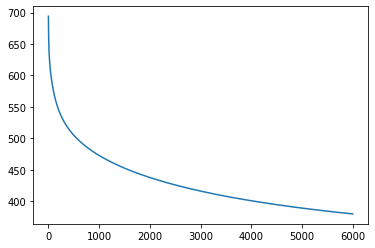

In [44]:
def main():
    X, Y = getBinaryData()

    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 9, axis=0)
    X = np.vstack([X0, X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))
    
    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    model.score(X, Y)
    # scores = cross_val_score(model, X, Y, cv=5)
    # print "score mean:", np.mean(scores), "stdev:", np.std(scores)

if __name__ == '__main__':
    main()